# Autoencoder For Images

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist

## Part One - Reconstructing Data

### Importing Data

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


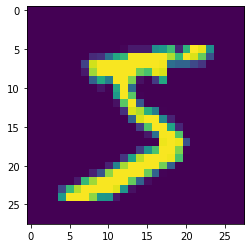

In [ ]:
plt.imshow(X_train[0])

### Scaling Data

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

### Building Autoencoder

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.optimizers import SGD

In [ ]:
28*28

784

In [ ]:
784/2

392.0

#### Creating Encoder

In [ ]:
encoder = Sequential()

encoder.add(Flatten(input_shape = [28, 28]))

encoder.add(Dense(units = 400, activation = 'relu'))
encoder.add(Dense(units = 200, activation = 'relu'))
encoder.add(Dense(units = 100, activation = 'relu'))
encoder.add(Dense(units = 50, activation = 'relu'))
encoder.add(Dense(units = 25, activation = 'relu'))

In [ ]:
25/784

0.03188775510204082

#### Creating Decoder

In [ ]:
decoder = Sequential()

decoder.add(Dense(units = 50, activation = 'relu', input_shape = [25]))
decoder.add(Dense(units = 100, activation = 'relu'))
decoder.add(Dense(units = 200, activation = 'relu'))
decoder.add(Dense(units = 400, activation = 'relu'))
decoder.add(Dense(units = 784, activation = 'sigmoid'))

decoder.add(Reshape([28, 28]))

#### Creating Full Model

In [ ]:
autoencoder = Sequential([encoder, decoder])

In [ ]:
autoencoder.compile(loss = 'binary_crossentropy', optimizer = SGD(learning_rate = 1.5), metrics = ['accuracy'])

#### Training

In [ ]:
autoencoder.fit(X_train, X_train, epochs = 5, validation_data = [X_test, X_test])

Epoch 1/5
1875/1875 [==============================] - 24s 12ms/step - loss: 0.2528 - accuracy: 0.0855 - val_loss: 0.2219 - val_accuracy: 0.1101
Epoch 2/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1907 - accuracy: 0.1507 - val_loss: 0.1631 - val_accuracy: 0.1832
Epoch 3/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1559 - accuracy: 0.1996 - val_loss: 0.1468 - val_accuracy: 0.2076
Epoch 4/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1462 - accuracy: 0.2140 - val_loss: 0.1450 - val_accuracy: 0.2182
Epoch 5/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1411 - accuracy: 0.2219 - val_loss: 0.1375 - val_accuracy: 0.2256


### Testing

In [ ]:
passed_images = autoencoder.predict(X_test[:10])

Original Image


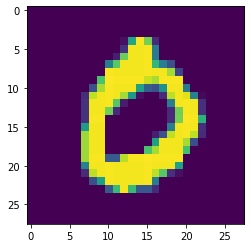

Reconstructed Image


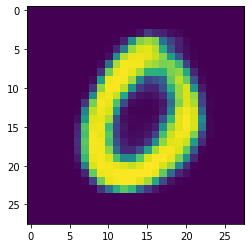

In [ ]:
n = 3

print("Original Image")
plt.imshow(X_test[n])
plt.show()
print("Reconstructed Image")
plt.imshow(passed_images[n])

## Part Two - Noise Removal

### How To Add Noise to Image Data

In [ ]:
from tensorflow.keras.layers import GaussianNoise

In [ ]:
sample = GaussianNoise(stddev = 0.2)

In [ ]:
noisey = sample(X_test[:20], training = True)

Original Image


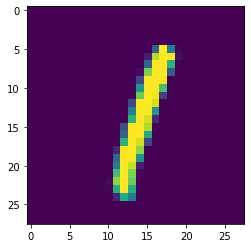

Noisey Image


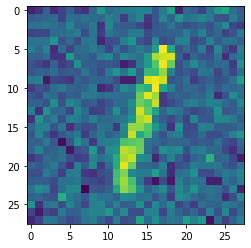

In [ ]:
n = 5

print("Original Image")
plt.imshow(X_test[n])
plt.show()
print("Noisey Image")
plt.imshow(noisey[n])

### Now Adding a Noise Layer in Autoencoder

#### Encoder

In [ ]:
encoder = Sequential()

encoder.add(Flatten(input_shape = [28, 28]))

encoder.add(GaussianNoise(stddev = 0.2))

encoder.add(Dense(units = 400, activation = 'relu'))
encoder.add(Dense(units = 200, activation = 'relu'))
encoder.add(Dense(units = 100, activation = 'relu'))
encoder.add(Dense(units = 50, activation = 'relu'))
encoder.add(Dense(units = 25, activation = 'relu'))

#### Decoder

In [ ]:
decoder = Sequential()

decoder.add(Dense(units = 50, activation = 'relu', input_shape = [25]))
decoder.add(Dense(units = 100, activation = 'relu'))
decoder.add(Dense(units = 200, activation = 'relu'))
decoder.add(Dense(units = 400, activation = 'relu'))
decoder.add(Dense(units = 784, activation = 'sigmoid'))

decoder.add(Reshape([28, 28]))

##### Autoencoder

In [ ]:
noise_remover = Sequential([encoder, decoder])

In [ ]:
noise_remover.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

#### Training

In [ ]:
noise_remover.fit(X_train, X_train, epochs = 8, validation_data = [X_test, X_test])

Epoch 1/8
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1729 - accuracy: 0.1824 - val_loss: 0.1368 - val_accuracy: 0.2235
Epoch 2/8
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1329 - accuracy: 0.2290 - val_loss: 0.1226 - val_accuracy: 0.2367
Epoch 3/8
1875/1875 [==============================] - 25s 14ms/step - loss: 0.1228 - accuracy: 0.2426 - val_loss: 0.1182 - val_accuracy: 0.2529
Epoch 4/8
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1179 - accuracy: 0.2511 - val_loss: 0.1117 - val_accuracy: 0.2597
Epoch 5/8
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1140 - accuracy: 0.2588 - val_loss: 0.1087 - val_accuracy: 0.2658
Epoch 6/8
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1108 - accuracy: 0.2641 - val_loss: 0.1076 - val_accuracy: 0.2659
Epoch 7/8
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1087 - accuracy: 0.2685 - val_loss: 0.1045 - val_ac

### Testing

In [ ]:
ten_noisy_images = sample(X_test[:10], training = True)

In [ ]:
denoised = noise_remover(ten_noisy_images)

**Keep In mind we add Noise already then because we have a "Noise Layer in Encoder" it will add Noise again. Means there will be Double noise in Images**

Original Image


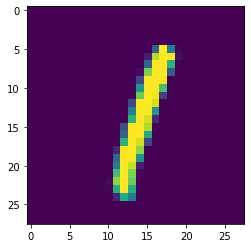

Noisy Image


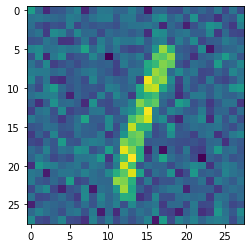

Denoised Image


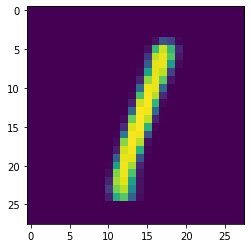

In [ ]:
n = 5

print("Original Image")
plt.imshow(X_test[n])
plt.show()

print("Noisy Image")
plt.imshow(ten_noisy_images[n])
plt.show()

print("Denoised Image")
plt.imshow(denoised[n])
plt.show()

## Conclusion

Previously in CNN lecture i was able to acheive 98% accuracy on **MNIST** with relatively simple architecture. SO this time I will try reducing dimension and then with a simple architecture i will see what accuracy i get.


---


**Note:** This is just for fun and curiosity


---

92% Accuracy was not bad so dimensionality Reduction can be worth but i do not know how does it compare in real life senarios from what I have seen people say is "Autoencoders are not very useful for now".

In [ ]:
#####  Encoder

encoder = Sequential()

encoder.add(Flatten(input_shape = [28, 28]))

encoder.add(Dense(units = 400, activation = 'relu'))
encoder.add(Dense(units = 200, activation = 'relu'))
encoder.add(Dense(units = 100, activation = 'relu'))
encoder.add(Dense(units = 50, activation = 'relu'))
encoder.add(Dense(units = 25, activation = 'relu'))


#####  Decoder

decoder = Sequential()

decoder.add(Dense(units = 50, activation = 'relu', input_shape = [25]))
decoder.add(Dense(units = 100, activation = 'relu'))
decoder.add(Dense(units = 200, activation = 'relu'))
decoder.add(Dense(units = 400, activation = 'relu'))
decoder.add(Dense(units = 784, activation = 'sigmoid'))

decoder.add(Reshape([28, 28]))


#####  Autoencoder

autoencoder = Sequential([encoder, decoder])
autoencoder.compile(loss = 'binary_crossentropy', optimizer = SGD(learning_rate = 1.5), metrics = ['accuracy'])

In [ ]:
autoencoder.fit(X_train, X_train, epochs = 5, validation_data = [X_test, X_test])

Epoch 1/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2480 - accuracy: 0.0965 - val_loss: 0.2025 - val_accuracy: 0.1528
Epoch 2/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1769 - accuracy: 0.1736 - val_loss: 0.1641 - val_accuracy: 0.1855
Epoch 3/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1548 - accuracy: 0.2012 - val_loss: 0.1477 - val_accuracy: 0.2020
Epoch 4/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1449 - accuracy: 0.2165 - val_loss: 0.1450 - val_accuracy: 0.2156
Epoch 5/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.1390 - accuracy: 0.2255 - val_loss: 0.1380 - val_accuracy: 0.2277


In [ ]:
X_train_reduced = encoder.predict(X_train)
X_test_reduced = encoder.predict(X_test)

In [ ]:
from tensorflow.keras.utils import to_categorical

y_cat_test = to_categorical(y_test, num_classes = 10)
y_cat_train = to_categorical(y_train, num_classes = 10)

In [ ]:
model = Sequential()

model.add(Dense(25, activation = 'relu'))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(15, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))


model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
model.fit(X_train_reduced, y_cat_train, epochs = 5, validation_data = [X_test_reduced, y_cat_test])

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5377 - accuracy: 0.8286 - val_loss: 0.3123 - val_accuracy: 0.9034
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2963 - accuracy: 0.9058 - val_loss: 0.2801 - val_accuracy: 0.9127
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2715 - accuracy: 0.9111 - val_loss: 0.2623 - val_accuracy: 0.9165
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2581 - accuracy: 0.9155 - val_loss: 0.2599 - val_accuracy: 0.9153
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2502 - accuracy: 0.9182 - val_loss: 0.2526 - val_accuracy: 0.9203


In [ ]:
losses = pd.DataFrame(model.history.history)

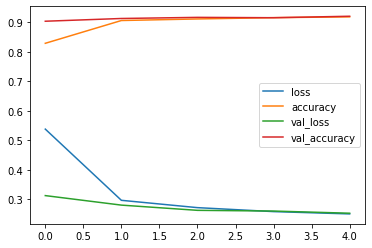

In [ ]:
losses.plot()

In [ ]:
predictions = model.predict(X_test_reduced)
predictions = np.argmax(predictions, axis = 1)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       980
           1       0.98      0.99      0.98      1135
           2       0.93      0.93      0.93      1032
           3       0.92      0.91      0.91      1010
           4       0.92      0.91      0.92       982
           5       0.82      0.91      0.87       892
           6       0.96      0.94      0.95       958
           7       0.93      0.91      0.92      1028
           8       0.91      0.85      0.88       974
           9       0.87      0.87      0.87      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [ ]:
confusion_matrix(y_test, predictions)

array([[ 949,    0,    2,    0,    1,   15,   11,    1,    1,    0],
       [   0, 1119,    5,    1,    1,    1,    3,    1,    4,    0],
       [   5,    1,  959,   23,    3,    3,    7,   11,   18,    2],
       [   0,    0,   15,  919,    1,   45,    0,    9,   20,    1],
       [   1,    1,    3,    0,  896,    1,   14,    4,    3,   59],
       [   5,    0,    5,   25,    2,  816,    4,    5,   25,    5],
       [  17,    3,    1,    0,   13,   15,  904,    1,    2,    2],
       [   0,    9,   21,    1,    9,    0,    0,  938,    0,   50],
       [   6,    1,   11,   21,    4,   80,    2,    6,  826,   17],
       [   4,    7,    4,   13,   43,   18,    0,   36,    7,  877]])